# <center>AQM FS 2021</center>

<h2 align="center"> FX III: Building stable and robust models. Identify the relationships with most stable coefficients over time</h2> 

### Submitted By:
**Antoine Mettler** 15-712-110

**Dennis Leutwiler** 20-641-676

**Gamze Kozan** 12-467-809

## <center>Assignment Description</center>

III. Building stable and robust models. Identify the relationships with most stable coefficients over time
- Download monthly data for asset prices for at least 10 assets and at least 10 macroeconomic variables

- Split the data into 4 sub-periods and calculate the descriptive statistics for each of them, as it was the case in AQM Class 1

- For each asset, run the stationarity test and decide which variable is stationary

- For each asset price or return (as dependent variable), create a loop where you:

        - Test at least 5 multivariate OLS models using different combinations of macroeconomic variables. 
          Save all the results into a table.
          
        - Choose the most promising regressions and
        
        - For each regression run the Chow test in the middle of the sample and verify 
          whether the model is stable or not. Save all the results into a table.
          
        - Run the rolling window regressions to see whether the Betas are stable over time. Analyze
        
- Summarize which models are most stable over time.


## <center>Imports</center>

In [89]:
import eikon as ek
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import dataframe_image as dfi
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
import scipy.stats
import scipy as sp
import seaborn as sns
import xlsxwriter
from math import exp, sqrt, log
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import xlsxwriter
import dataframe_image as dfi
from termcolor import colored
import sys

## <center>Download monthly data for asset prices (10) assets, (10) macroeconomic variables</center>

### <center>Excel Extraction via Refintiv Workspace</center>
<center>Refer to Word document regarding the extraction of data from Refinitiv in Excel</center>

### <center>Read in Excel Files - Y-Data (Currencies) & X-Data (Macroeconomic Indicators)</center>

#### Reading in Y-Data (Currencies)

In [65]:
path = r"Currencies - Final.xlsx"
y_var = pd.read_excel(path, dtype=None)

y_data = y_var.iloc[::-1]

y_data.head()

,Unnamed: 0,Date,EUR,GBP,JPY,CHF,AUD,CAD,CNY,NZD,SEK,HKD
239,251,2000-01-31,1.031460,0.618888,107.40,1.65660,1.570228,1.44585,8.2786,2.017960,8.86625,7.78035
238,250,2000-02-29,1.036592,0.633392,110.23,1.66450,1.615900,1.44890,8.2787,2.038944,8.75025,7.78280
237,249,2000-03-31,1.045861,0.628101,102.80,1.66465,1.645955,1.44910,8.2799,2.014302,8.64000,7.78665
236,248,2000-04-30,1.096191,0.644330,108.20,1.71720,1.712769,1.48100,8.2773,2.060793,8.91825,7.78910
235,247,2000-05-31,1.066212,0.666045,107.65,1.68100,1.746877,1.49680,8.2782,2.183645,8.94125,7.79215


#### Reading in X-Data (Macroeconomic Indicators)

In [104]:
path = r"Economic Indicators Combined Total.xlsx"
x_var = pd.read_excel(path, dtype=None)
x_data = x_var.iloc[::-1]
x_data.head()

,Unnamed: 0,Date,10Y US Bond Yield,CPI,Fed Funds Rate,GDP Growth Monthly,New_Home_Sales,Non-Farm Payrolls,Oil Prices,PMI,Unemployment Rate,US Trade Balance
239,240,2000-01-01,7.642,0.3,5.87,-0.01,873000,233000,27.65,56.3,4.0,-26506000000
238,239,2000-02-01,7.602,0.4,5.85,0.01,856000,119000,30.57,56.9,4.1,-28640000000
237,238,2000-03-01,7.441,0.6,6.17,0.08,900000,472000,26.86,55.8,4.0,-30115000000
236,237,2000-04-01,7.601,-0.1,6.17,0.11,841000,292000,25.71,54.9,3.8,-28741000000
235,236,2000-05-01,7.649,0.2,6.83,0.07,857000,217000,29.03,53.2,4.0,-29906000000


### <center>Descriptive Stats Entire Period 2000-2020</center>

In [ ]:
#Descriptive Statistics whole period (Currencies)
Currencytotal = y_var[['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']].describe()
Currencytotal.columns.name = '2000-2020'

#Descriptive Statistics whole period (Macroeconomic Indicators)
datasetdescribe = x_var[['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']].describe()
datasetdescribe.columns.name = '2000-2020'

#Save results as a table for insertion into word document
dfi.export(Currencytotal, 'cur2000-2020.png')
dfi.export(datasetdescribe, 'ind2000-2020.png')

### Sample Output: descriptive stats

In [42]:
datasetdescribe

2000-2020,10Y US Bond Yield,CPI,Fed Funds Rate,GDP Growth Monthly,New_Home_Sales,Non-Farm Payrolls,Oil Prices,PMI,Unemployment Rate,US Trade Balance
count,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,3.828683,0.177083,1.788667,0.020167,6.926750e+05,88112.500000,62.132292,52.981667,5.881250,-4.463962e+10
std,1.590098,0.290606,1.946106,0.027534,3.038770e+05,215114.973272,26.270022,5.418865,1.809442,1.020595e+10
min,1.370000,-1.800000,0.040000,-0.100000,2.700000e+05,-800000.000000,19.460000,32.400000,3.500000,-6.827700e+10
25%,2.397500,0.000000,0.140000,0.010000,4.317500e+05,7250.000000,41.682500,50.075000,4.575000,-5.062350e+10
50%,3.587350,0.200000,1.115000,0.020000,6.180000e+05,149000.000000,59.550000,53.500000,5.400000,-4.273250e+10
75%,5.093750,0.300000,2.502500,0.040000,9.367500e+05,221250.000000,82.092500,56.525000,6.825000,-3.854050e+10
max,7.649000,1.400000,6.860000,0.110000,1.389000e+06,540000.000000,139.960000,66.200000,10.000000,-2.584000e+10


### <center>Histogram creation & saves - checking distribution</center>

#### Currency Histograms

In [ ]:
#distribution of variables (currencies)

plt.style.use('ggplot')
y_var.iloc[:,2].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - EUR', size=24)
plt.xlabel('EUR', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'EUR' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,3].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - GBP', size=24)
plt.xlabel('GBP', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'GBP' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,4].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - JPY', size=24)
plt.xlabel('JPY', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'JPY' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,5].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CHF', size=24)
plt.xlabel('CHF', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'CHF' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,6].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - AUD', size=24)
plt.xlabel('AUD', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'AUD' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,7].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CAD', size=24)
plt.xlabel('CAD', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'CAD' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,8].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CNY', size=24)
plt.xlabel('CNY', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'CNY' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,9].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - NZD', size=24)
plt.xlabel('NZD', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'NZD' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,10].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - SEK', size=24)
plt.xlabel('SEK', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'SEK' +'.png')

In [ ]:
plt.style.use('ggplot')
y_var.iloc[:,11].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - HKD', size=24)
plt.xlabel('HKD', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_'+ 'HKD' +'.png')

#### Indicator Histograms

In [ ]:
#distribution of variables (indicators)

plt.style.use('ggplot')
x_var.iloc[:,9].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - PMI', size=24)
plt.xlabel('PMI', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_PMI.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,11].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - US Trade Balance', size=24)
plt.xlabel('US Trade Balance', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_US_Trade_Balance.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,10].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Unemployment', size=24)
plt.xlabel('Unemployment', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_Unemployment.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,7].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Non-farm Payrolls', size=24)
plt.xlabel('Non-Farm Payrolls', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_Non-Farm_Payrolls.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,8].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Oil Prices', size=24)
plt.xlabel('Oil Prices', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_Oil_Prices.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,6].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - New Home Sales', size=24)
plt.xlabel('New Home Sales', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_New_Home_Sales.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,2].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - 10Y US Bond Yield', size=24)
plt.xlabel('10 Year Government Bond Yield', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_GOV_10Y_Yield.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,5].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - GDP Growth Monthly', size=24)
plt.xlabel('GDP Growth Monthly', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_GDP_Growth_Monthly.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,4].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Fed Funds Rate', size=24)
plt.xlabel('Fed Funds Rate', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_Fed_Funds_Rate.png')

In [ ]:
plt.style.use('ggplot')
x_var.iloc[:,3].plot(kind='hist', color='skyblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CPI', size=24)
plt.xlabel('CPI', size=18)
plt.ylabel('Frequency', size=18)
plt.savefig('Hist_CPI.png')

### Sample Output: Histograms (currencies & indicators)
Observation: these grouped histograms below are intended for visual understanding for readers of the code. For the main work the code above was used which produced sharper, larger histograms for insertion into the word document. 

array([[<AxesSubplot:title={'center':'EUR'}>,
        <AxesSubplot:title={'center':'GBP'}>,
        <AxesSubplot:title={'center':'JPY'}>],
       [<AxesSubplot:title={'center':'CHF'}>,
        <AxesSubplot:title={'center':'AUD'}>,
        <AxesSubplot:title={'center':'CAD'}>],
       [<AxesSubplot:title={'center':'CNY'}>,
        <AxesSubplot:title={'center':'NZD'}>,
        <AxesSubplot:title={'center':'SEK'}>],
       [<AxesSubplot:title={'center':'HKD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

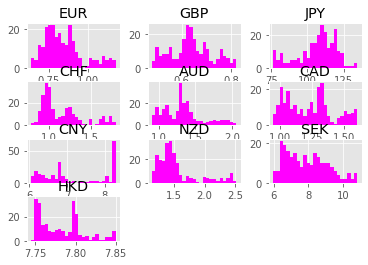

In [102]:
#The following histograms are only intended as a visual representation of the ones created for insertion into the word document
#CURRENCIES
yvarh = y_var.copy()
yvarh.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)
yvarh.drop(axis = 1, columns = 'Date', inplace = True)
yvarh.hist(bins=25, color='magenta')

array([[<AxesSubplot:title={'center':'10Y US Bond Yield'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Fed Funds Rate'}>],
       [<AxesSubplot:title={'center':'GDP Growth Monthly'}>,
        <AxesSubplot:title={'center':'New_Home_Sales'}>,
        <AxesSubplot:title={'center':'Non-Farm Payrolls'}>],
       [<AxesSubplot:title={'center':'Oil Prices'}>,
        <AxesSubplot:title={'center':'PMI'}>,
        <AxesSubplot:title={'center':'Unemployment Rate'}>],
       [<AxesSubplot:title={'center':'US Trade Balance'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

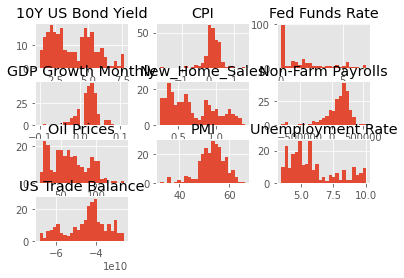

In [72]:
#The following histograms are only intended as a visual representation of the ones created for insertion into the word document
#CURRENCIES
xvarh = x_var.copy()
xvarh.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)
xvarh.drop(axis = 1, columns = 'Date', inplace = True)
xvarh.hist(bins=25)

### <center>Normality Tests of Data (Shapiro-Wilk Tests)</center>

In [100]:
#Shapiro-Wilk Normality Test EUR
print('===============Currencies====================')
stat,p=sp.stats.shapiro(y_var['EUR'])                  

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('EUR Sample looks Gaussian (fail to reject H0)')
else:
	print('EUR Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')        
    
stat,p=sp.stats.shapiro(y_var['GBP'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('GBP Sample looks Gaussian (fail to reject H0)')
else:
	print('GBP Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['JPY'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('JPY Sample looks Gaussian (fail to reject H0)')
else:
	print('JPY Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['CHF'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('CHF Sample looks Gaussian (fail to reject H0)')
else:
	print('CHF Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['AUD'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('AUD Sample looks Gaussian (fail to reject H0)')
else:
	print('AUD Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['CAD'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('CAD Sample looks Gaussian (fail to reject H0)')
else:
	print('CAD Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['CNY'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('CNY Sample looks Gaussian (fail to reject H0)')
else:
	print('CNY Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['NZD'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('NZD Sample looks Gaussian (fail to reject H0)')
else:
	print('NZD Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['SEK'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('SEK Sample looks Gaussian (fail to reject H0)')
else:
	print('SEK Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')
    
stat,p=sp.stats.shapiro(y_var['HKD'])

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('HKD Sample looks Gaussian (fail to reject H0)')
else:
	print('HKD Sample does not look Gaussian (reject H0)')
	print('_____________________________________________')

print(colored('===============Indicators====================', 'magenta'))

stat,p=sp.stats.shapiro(x_var['PMI'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('PMI Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('PMI Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))
    
stat,p=sp.stats.shapiro(x_var['US Trade Balance'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('US TRade Balance Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('US Trade Balance Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))  
    
stat,p=sp.stats.shapiro(x_var['Unemployment Rate'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('Unemployment Rate Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('Unemployment Rate Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))
    
stat,p=sp.stats.shapiro(x_var['Non-Farm Payrolls'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('Non-Farm Payrolls Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('Non-Farm Payrolls Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['Oil Prices'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('Oil Prices Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('Oil Prices Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['New_Home_Sales'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('New Home Sales Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('New Home Sales Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['10Y US Bond Yield'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('10Y Bond Yield Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('10Y Bond Yield Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['GDP Growth Monthly'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('GDP Growth Monthly Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('GDP Growth Monthly Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['Fed Funds Rate'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('Fed Funds Rate Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('Fed Funds Rate Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

stat,p=sp.stats.shapiro(x_var['CPI'])

print(colored("p-value for Shapiro-Wilk: ", 'magenta'))
print(colored(p, 'magenta'))

alpha = 0.05
if p > alpha:
	print(colored('CPI Sample looks Gaussian (fail to reject H0)', 'magenta'))
else:
	print(colored('CPI Sample does not look Gaussian (reject H0)', 'magenta'))
	print(colored('_____________________________________________', 'magenta'))

===============Currencies====================
p-value for Shapiro-Wilk: 
1.0871971101167333e-09
EUR Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
0.0003246187116019428
GBP Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
2.753682259992729e-08
JPY Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
5.115418315717116e-14
CHF Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
6.016572573486201e-09
AUD Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
5.8618859100079135e-08
CAD Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
5.66396024049079e-15
CNY Sample does not look Gaussian (reject H0)
____________

### <center>API Check</center>


In [ ]:
#Setting API Key - Generated on Refintiv Workspace through API Key Generator 
ek.set_app_key('8c587a40d93448a9b47a3e089fb88b3f0cee9764')

In [ ]:
#Pulling Data for each currency 
EUR = ek.get_timeseries('EUR=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
GBP = ek.get_timeseries('GBP=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
JPY = ek.get_timeseries('JPY=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
CHF = ek.get_timeseries('CHF=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
AUD = ek.get_timeseries('AUD=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
CAD = ek.get_timeseries('CAD=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
CNY = ek.get_timeseries('CNY=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
NZD = ek.get_timeseries('NZD=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
SEK = ek.get_timeseries('SEK=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
HKD = ek.get_timeseries('HKD=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')

#### Sample output of raw API generated tables 
For presentation in word document - it was decided to make the raw API data more presentable: 

In [ ]:
HKD.head(12)

In [ ]:
#Remove unnecessary Columns 
EUR = EUR.drop(axis = 1, columns = 'COUNT')
EUR = EUR.drop(axis = 1, columns = 'OPEN')
EUR = EUR.drop(axis = 1, columns = 'CLOSE')

GBP = GBP.drop(axis = 1, columns = 'COUNT')
GBP = GBP.drop(axis = 1, columns = 'OPEN')
GBP = GBP.drop(axis = 1, columns = 'CLOSE')

JPY = JPY.drop(axis = 1, columns = 'COUNT')
JPY = JPY.drop(axis = 1, columns = 'OPEN')
JPY = JPY.drop(axis = 1, columns = 'CLOSE')

CHF = CHF.drop(axis = 1, columns = 'COUNT')
CHF = CHF.drop(axis = 1, columns = 'OPEN')
CHF = CHF.drop(axis = 1, columns = 'CLOSE')

AUD = AUD.drop(axis = 1, columns = 'COUNT')
AUD = AUD.drop(axis = 1, columns = 'OPEN')
AUD = AUD.drop(axis = 1, columns = 'CLOSE')

CAD = CAD.drop(axis = 1, columns = 'COUNT')
CAD = CAD.drop(axis = 1, columns = 'OPEN')
CAD = CAD.drop(axis = 1, columns = 'CLOSE')

CNY = CNY.drop(axis = 1, columns = 'COUNT')
CNY = CNY.drop(axis = 1, columns = 'OPEN')
CNY = CNY.drop(axis = 1, columns = 'CLOSE')

NZD = NZD.drop(axis = 1, columns = 'COUNT')
NZD = NZD.drop(axis = 1, columns = 'OPEN')
NZD = NZD.drop(axis = 1, columns = 'CLOSE')

SEK = SEK.drop(axis = 1, columns = 'COUNT')
SEK = SEK.drop(axis = 1, columns = 'OPEN')
SEK = SEK.drop(axis = 1, columns = 'CLOSE')

HKD = HKD.drop(axis = 1, columns = 'COUNT')
HKD = HKD.drop(axis = 1, columns = 'OPEN')
HKD = HKD.drop(axis = 1, columns = 'CLOSE')

In [ ]:
#Generation of Mid Price Column 

EURAV = EUR.copy()
EURAV['MID PRICE (API)'] = EURAV.mean(numeric_only=True, axis=1)

GBPAV = GBP.copy()
GBPAV['MID PRICE (API)'] = GBPAV.mean(numeric_only=True, axis=1)

JPYAV = JPY.copy()
JPYAV['MID PRICE (API)'] = JPYAV.mean(numeric_only=True, axis=1)

CHFAV = CHF.copy()
CHFAV['MID PRICE (API)'] = CHFAV.mean(numeric_only=True, axis=1)

AUDAV = AUD.copy()
AUDAV['MID PRICE (API)'] = AUDAV.mean(numeric_only=True, axis=1)

CADAV = CAD.copy()
CADAV['MID PRICE (API)'] = CADAV.mean(numeric_only=True, axis=1)

CNYAV = CNY.copy()
CNYAV['MID PRICE (API)'] = CNYAV.mean(numeric_only=True, axis=1)

NZDAV = NZD.copy()
NZDAV['MID PRICE (API)'] = NZDAV.mean(numeric_only=True, axis=1)

SEKAV = SEK.copy()
SEKAV['MID PRICE (API)'] = SEKAV.mean(numeric_only=True, axis=1)

HKDAV = HKD.copy()
HKDAV['MID PRICE (API)'] = HKDAV.mean(numeric_only=True, axis=1)

In [ ]:
#INVERT TABLES TO MATCH EXCEL DATA (WHICH STARTS FROM 2019-12-31)
EURAVF = EURAV.iloc[::-1]
GBPAVF = GBPAV.iloc[::-1]
JPYAVF = JPYAV.iloc[::-1]
CHFAVF = CHFAV.iloc[::-1]
AUDAVF = AUDAV.iloc[::-1]
CADAVF = CADAV.iloc[::-1]
CNYAVF = CNYAV.iloc[::-1]
NZDAVF = NZDAV.iloc[::-1]
SEKAVF = SEKAV.iloc[::-1]
HKDAVF = HKDAV.iloc[::-1]

In [ ]:
#CREATE SEPERATE TABLES WITH JUST FINAL YEAR DATA FOR COMPARISON TO API's - (Tables in final work show just 1 year)
EURO = EURAVF.head(12).astype(float)
GREAT = GBPAVF.head(12).astype(float)
JAP = JPYAVF.head(12).astype(float)
SWISS = CHFAVF.head(12).astype(float)
AUST = AUDAVF.head(12).astype(float)
CANA = CADAVF.head(12).astype(float)
CHINA = CNYAVF.head(12).astype(float)
NEWZ = NZDAVF.head(12).astype(float)
SWED = SEKAVF.head(12).astype(float)
HONG = HKDAVF.head(12).astype(float)

In [ ]:
#Create table with just final year from currency final file 
DATA = Y_var.head(12)

In [ ]:
#POLISH AND CREATE TABLES FOR INSERTION INTO WORD DOCUMENT REPORT WITH COMPARISON OF API AND EXCEL PULLED DATA
EURO['EUR (EXCEL)'] = DATA['EUR']
EURO['EUR (EXCEL)'] = DATA['EUR'].values
EURO['Difference API-EXCEL'] = EURO['MID PRICE (API)'].sub(EURO['EUR (EXCEL)'], axis = 0)
EUROFINAL = EURO.style.background_gradient(subset=['Difference API-EXCEL'])

GREAT['GBP (EXCEL)'] = DATA['GBP']
GREAT['GBP (EXCEL)'] = DATA['GBP'].values
GREAT['Difference API-EXCEL'] = GREAT['MID PRICE (API)'].sub(GREAT['GBP (EXCEL)'], axis = 0)
GREATFINAL = GREAT.style.background_gradient(subset=['Difference API-EXCEL'])

JAP['JPY (EXCEL)'] = DATA['JPY']
JAP['JPY (EXCEL)'] = DATA['JPY'].values
JAP['Difference API-EXCEL'] = JAP['MID PRICE (API)'].sub(JAP['JPY (EXCEL)'], axis = 0)
JAPFINAL = JAP.style.background_gradient(subset=['Difference API-EXCEL'])

SWISS['CHF (EXCEL)'] = DATA['CHF']
SWISS['CHF (EXCEL)'] = DATA['CHF'].values
SWISS['Difference API-EXCEL'] = SWISS['MID PRICE (API)'].sub(SWISS['CHF (EXCEL)'], axis = 0)
SWISSFINAL = SWISS.style.background_gradient(subset=['Difference API-EXCEL'])

AUST['AUD (EXCEL)'] = DATA['AUD']
AUST['AUD (EXCEL)'] = DATA['AUD'].values
AUST['Difference API-EXCEL'] = AUST['MID PRICE (API)'].sub(AUST['AUD (EXCEL)'], axis = 0)
AUSTFINAL = AUST.style.background_gradient(subset=['Difference API-EXCEL'])

CANA['CAD (EXCEL)'] = DATA['CAD']
CANA['CAD (EXCEL)'] = DATA['CAD'].values
CANA['Difference API-EXCEL'] = CANA['MID PRICE (API)'].sub(CANA['CAD (EXCEL)'], axis = 0)
CANAFINAL = CANA.style.background_gradient(subset=['Difference API-EXCEL'])

CHINA['CNY (EXCEL)'] = DATA['CNY']
CHINA['CNY (EXCEL)'] = DATA['CNY'].values
CHINA['Difference API-EXCEL'] = CHINA['MID PRICE (API)'].sub(CHINA['CNY (EXCEL)'], axis = 0)
CHINAFINAL = CHINA.style.background_gradient(subset=['Difference API-EXCEL'])

NEWZ['NZD (EXCEL)'] = DATA['NZD']
NEWZ['NZD (EXCEL)'] = DATA['NZD'].values
NEWZ['Difference API-EXCEL'] = NEWZ['MID PRICE (API)'].sub(NEWZ['NZD (EXCEL)'], axis = 0)
NEWZFINAL = NEWZ.style.background_gradient(subset=['Difference API-EXCEL'])

SWED['SEK (EXCEL)'] = DATA['SEK']
SWED['SEK (EXCEL)'] = DATA['SEK'].values
SWED['Difference API-EXCEL'] = SWED['MID PRICE (API)'].sub(SWED['SEK (EXCEL)'], axis = 0)
SWEDFINAL = SWED.style.background_gradient(subset=['Difference API-EXCEL'])

HONG['HKD (EXCEL)'] = DATA['HKD']
HONG['HKD (EXCEL)'] = DATA['HKD'].values
HONG['Difference API-EXCEL'] = HONG['MID PRICE (API)'].sub(HONG['HKD (EXCEL)'], axis = 0)
HONGFINAL = HONG.style.background_gradient(subset=['Difference API-EXCEL'])

#### Sample output of API generated tables (Currencies)
Obersvation: Difference between API and EXCEL pulled data is negligible.

In [ ]:
HONGFINAL

In [ ]:
#save figures 
dfi.export(EUROFINAL, 'EURGRAPH.png')
dfi.export(GREATFINAL, 'GBPGRAPH.png')
dfi.export(JAPFINAL, 'JPYGRAPH.png')
dfi.export(SWISSFINAL, 'CHFGRAPH.png')
dfi.export(AUSTFINAL, 'AUDGRAPH.png')
dfi.export(CANAFINAL, 'CADGRAPH.png')
dfi.export(CHINAFINAL, 'CNYGRAPH.png')
dfi.export(NEWZFINAL, 'NZDGRAPH.png')
dfi.export(SWEDFINAL, 'SEKGRAPH.png')
dfi.export(HONGFINAL, 'HKDGRAPH.png')

In [ ]:
#Pulling Data for each indicator 
WTC = ek.get_timeseries('WTC-', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
USTB = ek.get_timeseries('aUSTBAL/A', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
CPI = ek.get_timeseries('USCPI=ECI', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
FEDFR = ek.get_timeseries('USONFFE=', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
GDPGM = ek.get_timeseries('aUSCBBKGPR', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
NFPR = ek.get_timeseries('USNFAR=ECI', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
GOV10Y = ek.get_timeseries('aUSEBM10Y', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
UNEMPL = ek.get_timeseries('USUNR=ECI', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
PMI = ek.get_timeseries('aUSPMIAQ', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')
NHS = ek.get_timeseries('USHNS=ECI', interval='monthly', start_date='2015-01-01', end_date='2019-12-31')

In [ ]:
#Remove unnecessary Columns 

WTC = WTC.drop(axis = 1, columns = 'LOW')
WTC = WTC.drop(axis = 1, columns = 'OPEN')
WTC = WTC.drop(axis = 1, columns = 'CLOSE')
WTC = WTC.drop(axis = 1, columns = 'HIGH')

FEDFR = FEDFR.drop(axis = 1, columns = 'CLOSE')
FEDFRAV = FEDFR.copy()
FEDFRAV['MID PRICE (API)'] = FEDFR.mean(numeric_only=True, axis=1)



In [ ]:
#Create table with just final year from currency final file 
Indicators = X_var.head(12)

In [ ]:
#INVERT TABLES TO MATCH EXCEL DATA (WHICH STARTS FROM 2019-12-31)
GOV10YF = GOV10Y.iloc[::-1]
CPIF = CPI.iloc[::-1]
FEDFRAVF = FEDFRAV.iloc[::-1]
GDPGMF = GDPGM.iloc[::-1]
NHSF = NHS.iloc[::-1]
NFPRF = NFPR.iloc[::-1]
WTCF = WTC.iloc[::-1]
PMIF = PMI.iloc[::-1]
UNEMPLF = UNEMPL.iloc[::-1]
USTBF = USTB.iloc[::-1]

In [ ]:
#CREATE SEPERATE TABLES WITH JUST FINAL YEAR DATA FOR COMPARISON TO API's
GOV10YFF = GOV10YF.head(12).astype(float)
CPIFF = CPIF.head(12).astype(float)
FEDFRAVFF = FEDFRAVF.head(12).astype(float)
GDPGMFF = GDPGMF.head(12).astype(float)
NHSFF = NHSF.head(12).astype(float)
NFPRFF = NFPRF.head(12).astype(float)
WTCFF = WTCF.head(12).astype(float)
PMIFF = PMIF.head(12).astype(float)
UNEMPLFF = UNEMPLF.head(12).astype(float)
USTBFF = USTBF.head(12).astype(float)

In [ ]:
#POLISH AND CREATE TABLES FOR INSERTION INTO WORD DOCUMENT REPORT WITH COMPARISON OF API AND EXCEL PULLED DATA
GOV10YFF['10Y US Bond Yield (EXCEL)'] = Indicators['10Y US Bond Yield']
GOV10YFF['10Y US Bond Yield (EXCEL)'] = Indicators['10Y US Bond Yield'].values
GOV10YFF['Difference API-EXCEL'] = GOV10YFF['VALUE'].sub(GOV10YFF['10Y US Bond Yield (EXCEL)'], axis = 0)
GOV10YFF = GOV10YFF.style.background_gradient(subset=['Difference API-EXCEL'])

CPIFF['CPI (EXCEL)'] = Indicators['CPI']
CPIFF['CPI (EXCEL)'] = Indicators['CPI'].values
CPIFF['Difference API-EXCEL'] = CPIFF['VALUE'].sub(CPIFF['CPI (EXCEL)'], axis = 0)
CPIFF = CPIFF.style.background_gradient(subset=['Difference API-EXCEL'])

GDPGMFF['GDP Growth Monthly (EXCEL)'] = Indicators['GDP Growth Monthly']
GDPGMFF['GDP Growth Monthly (EXCEL)'] = Indicators['GDP Growth Monthly'].values
GDPGMFF['Difference API-EXCEL'] = GDPGMFF['VALUE'].sub(GDPGMFF['GDP Growth Monthly (EXCEL)'], axis = 0)
GDPGMFF = GDPGMFF.style.background_gradient(subset=['Difference API-EXCEL'])

NHSFF['New_Home_Sales (EXCEL)'] = Indicators['New_Home_Sales']
NHSFF['New_Home_Sales (EXCEL)'] = Indicators['New_Home_Sales'].values
NHSFF['Difference API-EXCEL'] = NHSFF['VALUE'].sub(NHSFF['New_Home_Sales (EXCEL)'], axis = 0)
NHSFF = NHSFF.style.background_gradient(subset=['Difference API-EXCEL'])

NFPRFF['Non-Farm Payrolls (EXCEL)'] = Indicators['Non-Farm Payrolls']
NFPRFF['Non-Farm Payrolls (EXCEL)'] = Indicators['Non-Farm Payrolls'].values
NFPRFF['Difference API-EXCEL'] = NFPRFF['VALUE'].sub(NFPRFF['Non-Farm Payrolls (EXCEL)'], axis = 0)
NFPRFF = NFPRFF.style.background_gradient(subset=['Difference API-EXCEL'])

WTCFF['Oil Prices (EXCEL)'] = Indicators['Oil Prices']
WTCFF['Oil Prices (EXCEL)'] = Indicators['Oil Prices'].values
WTCFF['Difference API-EXCEL'] = WTCFF['VALUE'].sub(WTCFF['Oil Prices (EXCEL)'], axis = 0)
WTCFF = WTCFF.style.background_gradient(subset=['Difference API-EXCEL'])

PMIFF['PMI (EXCEL)'] = Indicators['PMI']
PMIFF['PMI (EXCEL)'] = Indicators['PMI'].values
PMIFF['Difference API-EXCEL'] = PMIFF['VALUE'].sub(PMIFF['PMI (EXCEL)'], axis = 0)
PMIFF = PMIFF.style.background_gradient(subset=['Difference API-EXCEL'])

UNEMPLFF['Unemployment (EXCEL)'] = Indicators['Unemployment Rate']
UNEMPLFF['Unemployment (EXCEL)'] = Indicators['Unemployment Rate'].values
UNEMPLFF['Difference API-EXCEL'] = UNEMPLFF['VALUE'].sub(UNEMPLFF['Unemployment (EXCEL)'], axis = 0)
UNEMPLFF = UNEMPLFF.style.background_gradient(subset=['Difference API-EXCEL'])

USTBFF['US Trade Balance (EXCEL)'] = Indicators['US Trade Balance']
USTBFF['US Trade Balance (EXCEL)'] = Indicators['US Trade Balance'].values
USTBFF['Difference API-EXCEL'] = USTBFF['VALUE'].sub(USTBFF['US Trade Balance (EXCEL)'], axis = 0)
USTBFF = USTBFF.style.background_gradient(subset=['Difference API-EXCEL'])

FEDFRAVFF['Fed Funds Rate (EXCEL)'] = Indicators['Fed Funds Rate']
FEDFRAVFF['Fed Funds Rate (EXCEL)'] = Indicators['Fed Funds Rate'].values
FEDFRAVFF['Difference API-EXCEL'] = FEDFRAVFF['MID PRICE (API)'].sub(FEDFRAVFF['Fed Funds Rate (EXCEL)'], axis = 0)
FEDFRAVFF = FEDFRAVFF.style.background_gradient(subset=['Difference API-EXCEL'])



#### Sample output of API generated tables (Macro Indicators)
Obersvation: Data is identical.

In [ ]:
USTBFF

In [ ]:
#Save Indicator API comparisons as tables 
dfi.export(GOV10YFF, 'GOV10YFF.png')
dfi.export(CPIFF, 'CPIFF.png')
dfi.export(GDPGMFF, 'GDPGMFF.png')
dfi.export(NHSFF, 'NHSFF.png')
dfi.export(NFPRFF, 'NFPRFF.png')
dfi.export(WTCFF, 'WTCFF.png')
dfi.export(UNEMPLFF, 'UNEMPLFF.png')
dfi.export(PMIFF, 'PMIFF.png')
dfi.export(USTBFF, 'USTBFF.png')
dfi.export(FEDFRAVFF, 'FEDFRAVFF.png')

## <center>Split the data into 4 sub-periods and calculate the descriptive statistics for each of them, as it was the case in AQM Class 1</center>

In [9]:
# Create smaller datasets by selecting dates from the index (Macroeconomic Indicators)
sample_1=x_var[0:60] # 2000-2005
sample_2=x_var[60:120] # 2005-2010
sample_3=x_var[120:180] # 2010-2015
sample_4=x_var[180:240] # 2015-2020 

sample_1a=y_var[0:60] # 2000-2005
sample_2a=y_var[60:120] # 2005-2010
sample_3a=y_var[120:180] # 2010-2015
sample_4a=y_var[180:240] # 2015-2020 

#### Sample output of descriptive statistics tables
Obersvation: this step is repeated for 4 sub-periods, tables identical in look to the one outputed below

In [12]:
datasetdescribe

2000-2020,10Y US Bond Yield,CPI,Fed Funds Rate,GDP Growth Monthly,New_Home_Sales,Non-Farm Payrolls,Oil Prices,PMI,Unemployment Rate,US Trade Balance
count,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,3.828683,0.177083,1.788667,0.020167,6.926750e+05,88112.500000,62.132292,52.981667,5.881250,-4.463962e+10
std,1.590098,0.290606,1.946106,0.027534,3.038770e+05,215114.973272,26.270022,5.418865,1.809442,1.020595e+10
min,1.370000,-1.800000,0.040000,-0.100000,2.700000e+05,-800000.000000,19.460000,32.400000,3.500000,-6.827700e+10
25%,2.397500,0.000000,0.140000,0.010000,4.317500e+05,7250.000000,41.682500,50.075000,4.575000,-5.062350e+10
50%,3.587350,0.200000,1.115000,0.020000,6.180000e+05,149000.000000,59.550000,53.500000,5.400000,-4.273250e+10
75%,5.093750,0.300000,2.502500,0.040000,9.367500e+05,221250.000000,82.092500,56.525000,6.825000,-3.854050e+10
max,7.649000,1.400000,6.860000,0.110000,1.389000e+06,540000.000000,139.960000,66.200000,10.000000,-2.584000e+10


In [11]:
#creation of sub-periods descirptive stats tables (Macroecon Indicators)

P4 = sample_1[['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']].describe()
P4.columns.name = '2015-2020'

P3 = sample_2[['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']].describe()
P3.columns.name = '2010-2015'

P2 = sample_3[['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']].describe()
P2.columns.name = '2005-2010'

P1 = sample_4[['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']].describe()
P1.columns.name = '2000-2005'

##creation of sub-periods descirptive stats tables (Currencies)

P4a = sample_1a[['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']].describe()
P4a.columns.name = '2015-2020'

P3a = sample_2a[['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']].describe()
P3a.columns.name = '2010-2015'

P2a = sample_3a[['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']].describe()
P2a.columns.name = '2005-2010'

P1a = sample_4a[['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']].describe()
P1a.columns.name = '2000-2005'

In [ ]:
#save tables as PNG for insertion into word document
dfi.export(P4, 'P4_styled.png')
dfi.export(P3, 'P3_styled.png')
dfi.export(P2, 'P2_styled.png')
dfi.export(P1, 'P1_styled.png')

dfi.export(P1a, 'cur2000-2005.png')
dfi.export(P2a, 'cur2005-2010.png')
dfi.export(P3a, 'cur2010-2015.png')
dfi.export(P4a, 'cur2015-2020.png')

## <center>For each asset, run the stationarity test and decide which variable is stationary</center>

In [13]:
#stationarity tests (currency)
currency=['EUR','GBP','JPY','CHF','AUD','CAD','CNY','NZD','SEK','HKD']


for i in currency:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(y_var[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(y_var[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
EUR in Level 
 ADF Stat (Library) for EUR : 0.14 
 ADF P-Val (Library) EUR : 0.73 

EUR in 1st Difference 
 ADF Stat (Library) for EUR : -10.82 
 ADF P-Val (Library) EUR : 0.00 

Number of lags used: 2
EUR in Level 
 ADF Stat (Library) for EUR : 0.18 
 ADF P-Val (Library) EUR : 0.74 

EUR in 1st Difference 
 ADF Stat (Library) for EUR : -8.62 
 ADF P-Val (Library) EUR : 0.00 

____________________________________________ 

Number of lags used: 1
GBP in Level 
 ADF Stat (Library) for GBP : -0.85 
 ADF P-Val (Library) GBP : 0.35 

GBP in 1st Difference 
 ADF Stat (Library) for GBP : -9.59 
 ADF P-Val (Library) GBP : 0.00 

Number of lags used: 2
GBP in Level 
 ADF Stat (Library) for GBP : -0.81 
 ADF P-Val (Library) GBP : 0.36 

GBP in 1st Difference 
 ADF Stat (Library) for GBP : -7.74 
 ADF P-Val (Library) GBP : 0.00 

____________________________________________ 

Number of lags used: 1
JPY in Level 
 ADF Stat (Library) for JPY : -0.26 
 ADF P-Val (Library) JPY 

In [18]:
#stationarity tests (indicators)
economic=['10Y US Bond Yield','CPI','Fed Funds Rate','GDP Growth Monthly','New_Home_Sales','Non-Farm Payrolls','Oil Prices','PMI','Unemployment Rate','US Trade Balance']


for i in economic:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(x_var[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(x_var[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
10Y US Bond Yield in Level 
 ADF Stat (Library) for 10Y US Bond Yield : 0.92 
 ADF P-Val (Library) 10Y US Bond Yield : 0.90 

10Y US Bond Yield in 1st Difference 
 ADF Stat (Library) for 10Y US Bond Yield : -12.07 
 ADF P-Val (Library) 10Y US Bond Yield : 0.00 

Number of lags used: 2
10Y US Bond Yield in Level 
 ADF Stat (Library) for 10Y US Bond Yield : 1.22 
 ADF P-Val (Library) 10Y US Bond Yield : 0.94 

10Y US Bond Yield in 1st Difference 
 ADF Stat (Library) for 10Y US Bond Yield : -8.73 
 ADF P-Val (Library) 10Y US Bond Yield : 0.00 

____________________________________________ 

Number of lags used: 1
CPI in Level 
 ADF Stat (Library) for CPI : -7.88 
 ADF P-Val (Library) CPI : 0.00 

CPI in 1st Difference 
 ADF Stat (Library) for CPI : -16.17 
 ADF P-Val (Library) CPI : 0.00 

Number of lags used: 2
CPI in Level 
 ADF Stat (Library) for CPI : -6.00 
 ADF P-Val (Library) CPI : 0.00 

CPI in 1st Difference 
 ADF Stat (Library) for CPI : -14.73 
 ADF P-Val

## <center>For **each** asset price or return (as dependent variable), create a loop where you:</center>

### -Test at least 5 multivariate OLS models using different combinations of macroeconomic variables. Save all the results into a table

### -For each regression run the Chow test in the middle of the sample and verify whether the model is stable or not. Save all the results into a table.

### -Run the rolling window regressions to see whether the Betas are stable over time. Analyze

#### OLS Loop Euro

In [19]:
# Loop for EUR

y=y_data['EUR']
x1=x_data[['New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    EUR   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 27 May 2021   Prob (F-statistic):           9.44e-76
Time:                        21:23:12   Log-Likelihood:                 341.08
No. Observations:                 240   AIC:                            -668.2
Df Residuals:                     233   BIC:                            -643.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4921      0.04

#### Chow-Test most promising EUR

In [20]:
# code for Chow-Test

# Model for the entire period
Y = y_data['EUR']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['EUR'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['EUR'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [21]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUR   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.52e-51
Time:                        21:25:50   Log-Likelihood:                 192.04
No. Observations:                 120   AIC:                            -362.1
Df Residuals:                     109   BIC:                            -331.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9939      0.124      7.996      0.000       0.748       1.240
10Y US Bond Yield      0.0882      0.013      6.595      0.000       0.062       0.115
CPI                    0.0017      0.016      0.108      0.914      -0.030       0.033
Fed Funds Rate        -0.0126      0.006     -2.166      0.032      -0.024      -0.001
GDP Growth Monthly     0.0044      0.189      0.023      0.982      -0.369       0.378
New_Home_Sales       1.63e-07   4.78e-08      3.408      0.001    6.82e-08    2.58e-07
Non-Farm Payrolls  -6.422e-08   4.53e-08     -1.417      0.159   -1.54e-07    2.56e-08
Oil Prices            -0.0013      0.001     -2.305      0.023      -0.002      -0.000
PMI                   -0.0069      0.002     -4.313      0.000      -0.010      -0.004
Unemployment Rate     -0.0143      0.009     -1.532      0.128      -0.033       0.004
US Trade Balance     4.15e-12   1.14e-12      3.654      0.000     1.9e-12     6.4e-12
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.248
Skew:                           0.211   Prob(JB):                        0.197
Kurtosis:                       2.313   Cond. No.                     1.96e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUR   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     74.39
Date:                Thu, 27 May 2021   Prob (F-statistic):           5.18e-44
Time:                        21:26:08   Log-Likelihood:                 263.22
No. Observations:                 120   AIC:                            -504.4
Df Residuals:                     109   BIC:                            -473.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0910      0.091     12.055      0.000       0.912       1.270
10Y US Bond Yield     -0.0086      0.007     -1.196      0.234      -0.023       0.006
CPI                    0.0062      0.014      0.450      0.654      -0.021       0.033
Fed Funds Rate        -0.0069      0.008     -0.839      0.403      -0.023       0.009
GDP Growth Monthly    -0.1023      0.144     -0.710      0.479      -0.388       0.183
New_Home_Sales      3.928e-08   7.32e-08      0.537      0.592   -1.06e-07    1.84e-07
Non-Farm Payrolls   7.806e-09    2.9e-08      0.269      0.788   -4.96e-08    6.53e-08
Oil Prices            -0.0022      0.000    -11.556      0.000      -0.003      -0.002
PMI                   -0.0015      0.001     -1.365      0.175      -0.004       0.001
Unemployment Rate     -0.0107      0.004     -2.718      0.008      -0.019      -0.003
US Trade Balance   -8.893e-13    8.6e-13     -1.034      0.303   -2.59e-12    8.15e-13
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.753
Skew:                           0.163   Prob(JB):                        0.686
Kurtosis:                       2.789   Cond. No.                     2.44e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [24]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [25]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9999999999999999

#### Rolling regression most promising EUR

In [26]:
def rolling_regression(y, x, window=60):
    # === Loop... this can be improved ====================================
    estimate_data = []
    for i in range(window, x.index.size+1):
        X_slice = X.values[i-window:i,:] # always index in np as opposed to pandas, much faster
        y_slice = y.values[i-window:i]
        coeff = np.dot(np.dot(np.linalg.inv(np.dot(X_slice.T, X_slice)), X_slice.T), y_slice)
        estimate_data.append(coeff[0] * x.values[window-1] + coeff[1])
    # === Assemble ========================================================
    estimate = pd.Series(data=estimate_data, index=x.index[window-1:]) 
    return estimate     

In [27]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['EUR']

In [28]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10
180,0.543496,0.003873,0.225122,0.009488,139488.062292,13589.420192,4.873601,6.585193,0.610343,-6.167798e+09
179,0.551090,0.000021,0.225963,0.005755,142446.891991,13877.676291,4.973046,6.720945,0.619355,-6.298630e+09
178,0.542523,-0.000953,0.221876,0.004702,140484.043645,13686.447836,4.903546,6.627360,0.609847,-6.211838e+09
177,0.543220,0.000638,0.223100,0.006285,140252.815677,13663.922232,4.897065,6.618042,0.610433,-6.201614e+09
176,0.547755,0.011226,0.231206,0.016809,138688.400404,13511.520960,4.853036,6.554816,0.614219,-6.132439e+09


<function matplotlib.pyplot.show(close=None, block=None)>

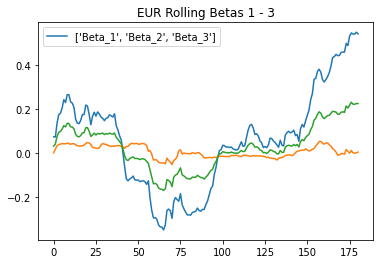

In [29]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('EUR Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

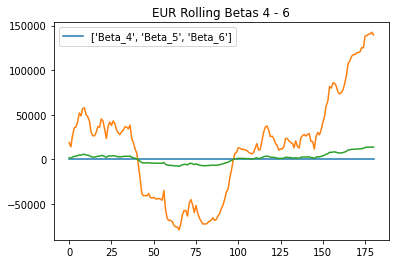

In [30]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('EUR Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

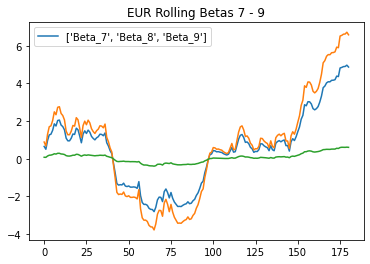

In [31]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('EUR Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'EUR' +'.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

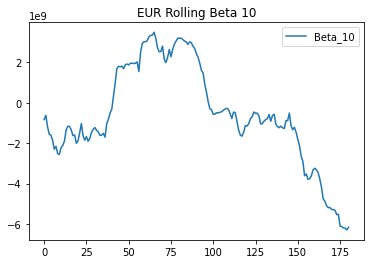

In [32]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('EUR Rolling Beta 10')
plt.savefig('Betas4_'+ 'EUR' +'.png')
plt.show

#### OLS Loop for GBP

In [33]:
y=y_data['GBP']
x1=x_data[['10Y US Bond Yield', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GBP   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     74.56
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.84e-51
Time:                        21:37:48   Log-Likelihood:                 385.91
No. Observations:                 240   AIC:                            -757.8
Df Residuals:                     233   BIC:                            -733.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0106      0.04

#### Chow-Test most promising GBP

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['GBP']
X = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['GBP'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['GBP'][120:]
X_2 = x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising GBP

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['GBP']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('GBP Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'GBP' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('GBP Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'GBP' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('GBP Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'GBP' +'.png')
plt.show

#### OLS Loop JPY

In [ ]:
y=y_data['JPY']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising JPY

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['JPY']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['JPY'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['JPY'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising JPY

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['JPY']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('JPY Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'JPY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('JPY Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'JPY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('JPY Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'JPY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('JPY Rolling Beta 10')
plt.savefig('Betas4_'+ 'JPY' +'.png')
plt.show

#### OLS Loop for CHF

In [ ]:
y=y_data['CHF']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising CHF

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CHF']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CHF'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CHF'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising CHF

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CHF']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CHF Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CHF' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CHF Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CHF' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CHF Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CHF' +'.png')
plt.show

#### OLS Loop for AUD

In [ ]:
y=y_data['AUD']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Unemployment Rate', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising AUD

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['AUD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['AUD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['AUD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising AUD

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['AUD']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('AUD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'AUD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('AUD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'AUD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('AUD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'AUD' +'.png')
plt.show

#### OLS Loop for CAD

In [ ]:
y=y_data['CAD']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'US Trade Balance']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Unemployment Rate', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising CAD

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CAD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CAD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CAD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising CAD

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CAD']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CAD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CAD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CAD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CAD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CAD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CAD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('CAD Rolling Beta 10')
plt.savefig('Betas4_'+ 'CAD' +'.png')
plt.show

#### OLS Loop for CNY

In [ ]:
y=y_data['CNY']
x1=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'US Trade Balance']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Unemployment Rate', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising CNY

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['CNY']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['CNY'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['CNY'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising CNY

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['CNY']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('CNY Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'CNY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('CNY Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'CNY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('CNY Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'CNY' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('CNY Rolling Beta 10')
plt.savefig('Betas4_'+ 'CNY' +'.png')
plt.show

#### OLS Loop for NZD

In [ ]:
y=y_data['NZD']
x1=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices']]
x2=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices',]]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'US Trade Balance']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'Unemployment Rate', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising NZD

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['NZD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['NZD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['NZD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising NZD

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['NZD']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('NZD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'NZD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('NZD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'NZD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('NZD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'NZD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('NZD Rolling Beta 10')
plt.savefig('Betas4_'+ 'NZD' +'.png')
plt.show

#### OLS Loop for SEK

In [ ]:
y=y_data['SEK']
x1=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x2=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x3=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'US Trade Balance']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising SEK

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['SEK']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['SEK'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['SEK'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising SEK

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]
Y= y_data['SEK']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('SEK Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'SEK' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('SEK Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'SEK' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('SEK Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'SEK' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed['Beta_10'])
labels=['Beta_10']
plt.legend(labels)
plt.title('SEK Rolling Beta 10')
plt.savefig('Betas4_'+ 'SEK' +'.png')
plt.show

#### OLS Loop for HKD

In [ ]:
y=y_data['HKD']
x1=x_data[['GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x2=x_data[['Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x3=x_data[['CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x4=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
x5=x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate', 'US Trade Balance']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

#### Chow-Test most promising HKD

In [ ]:
# code for Chow-Test

# Model for the entire period
Y = y_data['HKD']
X = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
X = sm.add_constant(X)

# Model for the first 5 years
Y_1 = y_data['HKD'][0:120]
X_1 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']][0:120]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = y_data['HKD'][120:]
X_2 = x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']][120:]
X_2 = sm.add_constant(X_2)

In [ ]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

In [ ]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

In [ ]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [ ]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [ ]:
# result is the p-value : null hypothesis: there are no break points (hypothesis is accepted (p-value: 0.999999))

chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

#### Rolling regression most promising HKD

In [ ]:
x_data=pd.DataFrame(x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']])
x_data['const']=1
X= x_data[['10Y US Bond Yield', 'CPI', 'Fed Funds Rate', 'GDP Growth Monthly', 'New_Home_Sales', 'Non-Farm Payrolls', 'Oil Prices', 'PMI', 'Unemployment Rate']]
Y= y_data['HKD']

In [ ]:
rolling_ols = rolling_regression(Y,X,60)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values)))
rolling_ols_transposed = rolling_ols.T
rolling_ols_transposed.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9"]
rolling_ols_transposed.head()

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_1','Beta_2','Beta_3']])
labels=[['Beta_1','Beta_2','Beta_3']]
plt.legend(labels)
plt.title('HKD Rolling Betas 1 - 3')
plt.savefig('Betas1_'+ 'HKD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_4','Beta_5','Beta_6']])
labels=[['Beta_4','Beta_5','Beta_6']]
plt.legend(labels)
plt.title('HKD Rolling Betas 4 - 6')
plt.savefig('Betas2_'+ 'HKD' +'.png')
plt.show

In [ ]:
plt.plot(rolling_ols_transposed[['Beta_7','Beta_8','Beta_9']])
labels=[['Beta_7','Beta_8','Beta_9']]
plt.legend(labels)
plt.title('HKD Rolling Betas 7 - 9')
plt.savefig('Betas3_'+ 'HKD' +'.png')
plt.show